## Note: mode1-taxi, mode2-FHV, mode3-shared FHV, mode4-PT, mode5-walking

In [120]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

## Data Preparation

In [121]:
acs = pd.read_csv('final_acs_transportation_choice.csv')
acs.head()

,taxi_zone,P(mode1),P(mode2),P(mode3),P(mode4),P(mode5)
0,3.0,0.228957,35.391246,14.547350,7706.507979,949.324468
1,4.0,46.244797,152.049702,91.310873,7487.249289,2840.145340
2,5.0,0.349401,56.498123,9.104389,7989.174863,173.873224
3,6.0,0.263186,18.439186,4.534672,4767.467108,478.295847
4,7.0,29.894066,167.041570,44.019826,33307.536619,3139.507920


In [122]:
mode_data_origin = pd.read_csv('final_allMode_with_wage.csv', index_col=0).set_index('ODpair')
mode_data_origin = mode_data_origin.dropna()
mode_data_origin.head()

,PUlocationID,DOlocationID,duration,price,2500,7500,12500,17500,22500,30000,42500,62500,87500,125000,225000,mode,nest
ODpair,,,,,,,,,,,,,,,,,
3-3,3,3,6.508943,16.647073,11.412271,16.389811,29.504545,12.840609,18.871367,26.936423,30.543336,42.705845,26.705581,33.702991,23.387221,1,1
3-4,3,4,39.695000,64.000000,0.250819,0.360216,0.648452,0.282211,0.414755,0.592009,0.671282,0.938590,0.586936,0.740725,0.514005,2,1
3-4,3,4,45.216667,61.500000,0.250819,0.360216,0.648452,0.282211,0.414755,0.592009,0.671282,0.938590,0.586936,0.740725,0.514005,3,1
3-4,3,4,83.000000,5.500000,0.250819,0.360216,0.648452,0.282211,0.414755,0.592009,0.671282,0.938590,0.586936,0.740725,0.514005,4,2
3-4,3,4,225.933333,0.000000,0.250819,0.360216,0.648452,0.282211,0.414755,0.592009,0.671282,0.938590,0.586936,0.740725,0.514005,5,3


**Remove same OD-pair**

since there is no data for PT and walking under same OD pair, need to remove the same OD pair for nest1 mode

In [124]:
mode_data_origin = mode_data_origin[mode_data_origin['PUlocationID'].astype(int) != mode_data_origin['DOlocationID'].astype(int)]
mode_data_origin.head()

,PUlocationID,DOlocationID,duration,price,2500,7500,12500,17500,22500,30000,42500,62500,87500,125000,225000,mode,nest
ODpair,,,,,,,,,,,,,,,,,
3-4,3,4,39.695000,64.000000,0.250819,0.360216,0.648452,0.282211,0.414755,0.592009,0.671282,0.93859,0.586936,0.740725,0.514005,2,1
3-4,3,4,45.216667,61.500000,0.250819,0.360216,0.648452,0.282211,0.414755,0.592009,0.671282,0.93859,0.586936,0.740725,0.514005,3,1
3-4,3,4,83.000000,5.500000,0.250819,0.360216,0.648452,0.282211,0.414755,0.592009,0.671282,0.93859,0.586936,0.740725,0.514005,4,2
3-4,3,4,225.933333,0.000000,0.250819,0.360216,0.648452,0.282211,0.414755,0.592009,0.671282,0.93859,0.586936,0.740725,0.514005,5,3
3-7,3,7,47.880952,43.157143,1.504915,2.161294,3.890709,1.693267,2.488532,3.552056,4.027693,5.63154,3.521615,4.444350,3.084029,1,1


#### Remove outliers

In [125]:
mode_data1 = mode_data_origin[mode_data_origin['nest']==1]
mode_data2 = mode_data_origin[mode_data_origin['nest']==2]
mode_data3 = mode_data_origin[mode_data_origin['nest']==3] 
mode_data1['diff'] = mode_data1['duration'] - mode_data1['price']
mode_data2['diff'] = mode_data2['duration'] - mode_data2['price']


def remove_outlier(df, var):
    '''
    Function for removing outliers
    '''
    # find Q1 and Q3 and IQR
    Q1, Q3 = df[var].quantile(0.25), df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    # find the data within desired range
    df = df[(df[var] >= lower) & (df[var] <= upper)]
    return df

**Remove outliers for nest 1:**

The original shape of nest1 data is (134817, 18)
The minmum difference is -7499.456115702478
The maximum difference is 1396.216666666667


Text(0.5, 1.0, 'The original nest1 hist of the difference between duration and price')

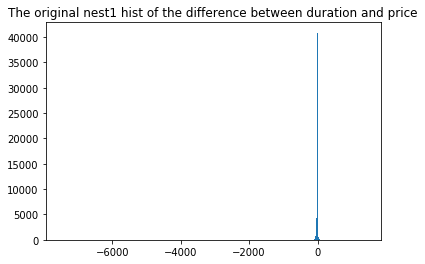

In [126]:
print('The original shape of nest1 data is', mode_data1.shape)
print('The minmum difference is', min(mode_data1['diff']))
print('The maximum difference is', max(mode_data1['diff']))
plt.hist(mode_data1['diff'], bins=1000)
plt.title('The original nest1 hist of the difference between duration and price')

The cleaned nest1 data shape is (126421, 18)
The minmum difference is -33.582051282051275
The maximum difference is 24.733333333333334


,PUlocationID,DOlocationID,duration,price,2500,7500,12500,17500,22500,30000,42500,62500,87500,125000,225000,mode,nest,diff
ODpair,,,,,,,,,,,,,,,,,,
3-4,3,4,39.695000,64.000000,0.250819,0.360216,0.648452,0.282211,0.414755,0.592009,0.671282,0.93859,0.586936,0.740725,0.514005,2,1,-24.305000
3-4,3,4,45.216667,61.500000,0.250819,0.360216,0.648452,0.282211,0.414755,0.592009,0.671282,0.93859,0.586936,0.740725,0.514005,3,1,-16.283333
3-7,3,7,47.880952,43.157143,1.504915,2.161294,3.890709,1.693267,2.488532,3.552056,4.027693,5.63154,3.521615,4.444350,3.084029,1,1,4.723810
3-7,3,7,30.521739,47.000000,1.504915,2.161294,3.890709,1.693267,2.488532,3.552056,4.027693,5.63154,3.521615,4.444350,3.084029,2,1,-16.478261
3-7,3,7,37.159009,45.000000,1.504915,2.161294,3.890709,1.693267,2.488532,3.552056,4.027693,5.63154,3.521615,4.444350,3.084029,3,1,-7.840991


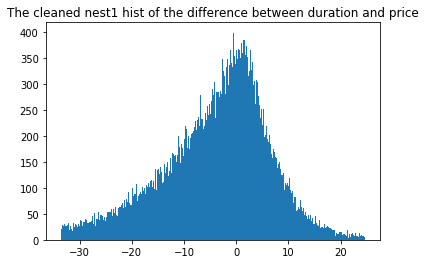

In [127]:
#remove obvious outliers
mode_data1 = remove_outlier(mode_data1, 'diff')
mode_data1 = mode_data1[(mode_data1['duration']!=0) | mode_data1['price']!=0]

print('The cleaned nest1 data shape is', mode_data1.shape)
plt.hist(mode_data1['diff'], bins=1000)
plt.title('The cleaned nest1 hist of the difference between duration and price')
print('The minmum difference is', min(mode_data1['diff']))
print('The maximum difference is', max(mode_data1['diff']))
mode_data1.head()

**Remove outliers for nest 2:**

The original shape of nest2 data is (55453, 18)
The minmum difference is 3.25
The maximum difference is 202.0


Text(0.5, 1.0, 'The original nest2 hist of the difference between duration and price')

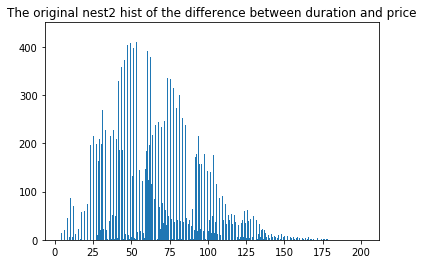

In [128]:
print('The original shape of nest2 data is', mode_data2.shape)
print('The minmum difference is', min(mode_data2['diff']))
print('The maximum difference is', max(mode_data2['diff']))
plt.hist(mode_data2['diff'], bins=1000)
plt.title('The original nest2 hist of the difference between duration and price')

The cleaned nest1 data shape is (55104, 18)
The minmum difference is 3.25
The maximum difference is 146.0


,PUlocationID,DOlocationID,duration,price,2500,7500,12500,17500,22500,30000,42500,62500,87500,125000,225000,mode,nest,diff
ODpair,,,,,,,,,,,,,,,,,,
3-4,3,4,83.0,5.50,0.250819,0.360216,0.648452,0.282211,0.414755,0.592009,0.671282,0.938590,0.586936,0.740725,0.514005,4,2,77.50
3-7,3,7,69.0,5.50,1.504915,2.161294,3.890709,1.693267,2.488532,3.552056,4.027693,5.631540,3.521615,4.444350,3.084029,4,2,63.50
3-9,3,9,74.0,8.25,0.083606,0.120072,0.216151,0.094070,0.138252,0.197336,0.223761,0.312863,0.195645,0.246908,0.171335,4,2,65.75
3-10,3,10,107.0,11.00,0.125410,0.180108,0.324226,0.141106,0.207378,0.296005,0.335641,0.469295,0.293468,0.370363,0.257002,4,2,96.00
3-11,3,11,106.0,5.50,0.167213,0.240144,0.432301,0.188141,0.276504,0.394673,0.447521,0.625727,0.391291,0.493817,0.342670,4,2,100.50


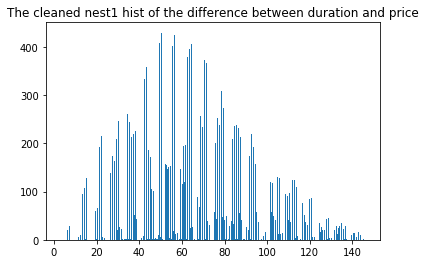

In [129]:
#remove obvious outliers
mode_data2 = remove_outlier(mode_data2, 'diff')
mode_data2 = mode_data2[(mode_data2['duration']!=0) | mode_data2['price']!=0]

print('The cleaned nest1 data shape is', mode_data2.shape)
plt.hist(mode_data2['diff'], bins=1000)
plt.title('The cleaned nest1 hist of the difference between duration and price')
print('The minmum difference is', min(mode_data2['diff']))
print('The maximum difference is', max(mode_data2['diff']))
mode_data2.head()

In [130]:
mode_data = pd.concat([mode_data1, mode_data2, mode_data3])
print(mode_data.shape)
mode_data.head()

(236289, 18)


,12500,125000,17500,22500,225000,2500,30000,42500,62500,7500,87500,DOlocationID,PUlocationID,diff,duration,mode,nest,price
ODpair,,,,,,,,,,,,,,,,,,
3-4,0.648452,0.740725,0.282211,0.414755,0.514005,0.250819,0.592009,0.671282,0.93859,0.360216,0.586936,4,3,-24.305000,39.695000,2,1,64.000000
3-4,0.648452,0.740725,0.282211,0.414755,0.514005,0.250819,0.592009,0.671282,0.93859,0.360216,0.586936,4,3,-16.283333,45.216667,3,1,61.500000
3-7,3.890709,4.444350,1.693267,2.488532,3.084029,1.504915,3.552056,4.027693,5.63154,2.161294,3.521615,7,3,4.723810,47.880952,1,1,43.157143
3-7,3.890709,4.444350,1.693267,2.488532,3.084029,1.504915,3.552056,4.027693,5.63154,2.161294,3.521615,7,3,-16.478261,30.521739,2,1,47.000000
3-7,3.890709,4.444350,1.693267,2.488532,3.084029,1.504915,3.552056,4.027693,5.63154,2.161294,3.521615,7,3,-7.840991,37.159009,3,1,45.000000


## Modeling

### Nested Logit Model

In [131]:
def utility(mode, wage, Lambda, dataset):
    '''
    Get the utility for mode j under specific OD pair
    Lambda: parameter that trade-off different transportation mode
    '''
    subset = dataset[dataset['mode'] == mode]
    vj = Lambda * (float(int(wage)/124800) * float(subset['duration']) + float(subset['price'])) #525600: convert wage scale 'year' to 'minitues'
    return -vj #assign negative utility?


def InclusiveValue(Nk, Tk, wage, dictVj, Lambda, dataset):
    '''
    Get the inclusive value for nest K
    Nk:nest k
    T: the dict that contains Tao(dissmilarity parameter) for each Nest. for example, Tk meeas Tao for nest K
    '''
    subsetNk = dataset[dataset['nest'] == Nk]
    modes = list(subsetNk['mode'].unique()) #what modes contained in this nest k
    sumIV = 0
    for j in modes:   
        vj = utility(j, wage, Lambda, subsetNk)
        dictVj[j] = vj
        sumIV += np.exp((1/Tk)*vj)  
    IVk = np.log(sumIV)
    return dictVj, IVk
    

def denoSum(T, nestList, wage, Lambda, dataset):
    '''
    Calculate the denomenator for P(y=Nk)
    T: the dict that contains Tk for each Nest, in our case T={1:T1, 2:T2, 3:T3}; T1, T2, T3 defined by us 
    TotK: the total number of nest this model has, in our case TotK = 3
    '''
    deno = 0
    dictIVk = {}
    dictVj = {}
    for Nk in nestList: #k is the k Nest, in our case k=1,2,3
        Tk = T[Nk] #get the tao for nest k 
        dictVj, IVk = InclusiveValue(Nk, Tk, wage, dictVj, Lambda, dataset)
        denok = np.exp(Tk*IVk)
        deno += denok
        dictIVk[Nk] = IVk
    return dictVj, dictIVk, deno


def probability (j, Nk, T, dictVj, dictIVk, deno):  
    '''
    Calculate the probability for the specific mode j and Nest Nk
    '''
    Tk = T[Nk]
    IVk = dictIVk[Nk]
    vj = dictVj[j]
    pjk = np.exp((1/Tk)*vj)/np.exp(IVk) #pjk: P(y=j, y belong to Nk)
    pk = np.exp(Tk*IVk)/deno #pk: P(y belong to Nk)
    pj = pjk*pk #pj: P(y=j)
    return pj

### Apply to our case

In [132]:
def apply_model(T, nestList, wageList, Lambda, dataAll):
    '''
    apply to our case
    '''
    import timeit
    start = timeit.default_timer()

    ODpair_list = list(dataAll.index.unique())
    p = []
    for i in ODpair_list: #indentify OD pair  
        dataOD = dataAll[dataAll.index==i] 
        modeList = list(dataOD['mode'])
        nestList = list(dataOD['nest'])
        
        pop_OD = [] #store the results under each OD pair
        for wage in wageList:            
            dictVj, dictIVk, deno = denoSum(T, set(nestList), wage, Lambda, dataOD)
            pop_mode = [] #store the results under each OD pair and each wage
            for i in range(1,6):
                if i in modeList: #not all modes appear in every OD pair
                    pop = dataOD[wage].mean() * probability(i, nestList[modeList.index(i)], T, dictVj, dictIVk, deno)
#                     print(wage, i,nestList[modeList.index(i)], pop)
                    if np.isnan(pop) == True: #if predicted population is nan, replace it as 0, means no people choose
                        pop = 0
                
                    pop_mode.append(pop)
                else: 
                    pop_mode.append(0)
            pop_OD.append(pop_mode)
        pop_OD_sum = [sum(x) for x in zip(*pop_OD)] #sum the weighted population under each wage scenario
        p.append(pop_OD_sum)

    df = pd.DataFrame(p, columns=['P(mode1)', 'P(mode2)', 'P(mode3)', 'P(mode4)', 'P(mode5)']
                      , index=ODpair_list)
    
    stop = timeit.default_timer()
    timeslot = stop - start
    return df, timeslot

def compare_with_ground_truth(predictdf, truedf):
    '''
    compare our predicted transportation choice with ground truth
    
    The header of the datafrme after merge (named 'data_compare') should be like:
    taxi_zone | P(mode1)_x | P(mode2)_x | P(mode3)_x | P(mode4)_x | P(mode5)_x | P(mode1)_y | P(mode2)_y | P(mode3)_y | P(mode4)_y | P(mode5)_y
    '''
    import numpy as np
    # makesure predictdf and truedf have the same formats
    for col in predictdf.columns:
        predictdf[col] = predictdf[col].astype(float) 
    predictdf = predictdf.fillna(0)
    predictdf = predictdf.replace([np.inf, -np.inf], np.nan)
    predictdf = predictdf.dropna()
    predictdf['taxi_zone'] = predictdf.index.map(lambda x: x.split('-')[0]) #get origin taxi zone from each OD pair
    predictdf = predictdf.groupby('taxi_zone').sum().reset_index() #group the popuation by taxi zone
    predictdf['taxi_zone'] = predictdf['taxi_zone'].astype(int)
    truedf['taxi_zone'] = truedf['taxi_zone'].astype(int)
    
    data_compare = pd.merge(predictdf, truedf, left_on='taxi_zone', right_on = 'taxi_zone', how = 'left')
    data_compare = data_compare.dropna() 
    
    rmse = 0
    for i in range(1,6):
        rmsei = np.sqrt(sum((data_compare[data_compare.columns[i]] - data_compare[data_compare.columns[i+5]])**2))
    rmse += rmsei
    return data_compare, rmse

In [133]:
#choose ODpair 3-1 to test the algrithm whether bug-free:
T1 = 3
T2 = 1
T3 = 1
T = {1:T1, 2:T2, 3:T3} #Tao for each nest
Lambda = 1 
nestList = [1, 2, 3]
wagelist = ['2500', '7500', '12500', '17500', '22500', '30000', '42500', '62500', '87500', '125000', '225000']
# testdf = mode_data[mode_data.index.isin(list(mode_data.index[:20]))] #test OD pair 3-1,3-2,3-3,3-4
testdf = mode_data[mode_data['PUlocationID']==3]
# testdf = mode_data[mode_data.index == '3-2']

predict_choice_test, timeslot_test = apply_model(T, nestList, wagelist, Lambda, testdf)
combine_test, rmse_test = compare_with_ground_truth(predict_choice_test, acs)
print('The time used to run the code:', timeslot_test)
print('The rmse of this model is:', rmse_test)
print()
print('The predict transportation choice is:')
predict_choice_test.head()

The time used to run the code: 13.784238000000187
The rmse of this model is: 192.86654614234385

The predict transportation choice is:


,P(mode1),P(mode2),P(mode3),P(mode4),P(mode5)
3-4,0.000000,4.744689e-01,0.039536,5.236155,0.249839
3-7,0.003762,3.291113e+00,0.174238,31.139544,1.391343
3-9,0.000000,6.040043e-01,0.025470,1.305387,0.065139
3-10,0.000000,0.000000e+00,0.257001,2.620965,0.122034
3-11,0.000000,8.805902e-33,0.000000,3.868835,0.131165


In [135]:
combine_test

,taxi_zone,P(mode1)_x,P(mode2)_x,P(mode3)_x,P(mode4)_x,P(mode5)_x,P(mode1)_y,P(mode2)_y,P(mode3)_y,P(mode4)_y,P(mode5)_y
0,3,708.073115,850.085341,449.851817,5940.932132,756.457922,0.228957,35.391246,14.54735,7706.507979,949.324468


### Tune the parameters

## Apply to Scenario 1

In [8]:
#Run the model for the whole dataset
T1 = 3000 #should set grid search for T1 
T2 = 1
T3 = 1
T = {1:T1, 2:T2, 3:T3} #Tao for each nest
Lambda = 2 #should set grid search for Lambda 
nestList = [1, 2, 3]
wagelist = ['2500', '7500', '12500', '17500', '22500', '30000', '42500', '62500', '87500', '125000', '225000']

predict_transportation_choice, timeslot = apply_model(T, nestList, wagelist, Lambda, mode_data)
combine, rmse = compare_with_ground_truth(predict_transportation_choice, acs)

In [9]:
print('The time used to run the code:', timeslot)
print('The mse of this model is:', mse)
print()
print('The predict transportation choice is:')
predict_transportation_choice

The time used to run the code: 3545.58184884
The mse of this model is: 4004786.8137141904

The predict transportation choice is:


,P(mode1),P(mode2),P(mode3),P(mode4),P(mode5)
3-1,561.083498,5.583506e+02,501.565913,0.000000,0.000000e+00
3-2,0.000000,0.000000e+00,0.000000,6170.000000,1.164735e-43
3-3,18922.000000,0.000000e+00,0.000000,0.000000,0.000000e+00
3-4,0.000000,8.481136e+02,772.886437,0.000000,0.000000e+00
3-5,0.000000,0.000000e+00,0.000000,4862.000000,1.407611e-83
3-6,0.000000,6.181992e+03,0.000000,3972.008201,2.108063e-54
3-7,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00
3-8,0.000000,0.000000e+00,0.000000,8037.000000,1.894266e-28
3-9,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00
3-10,0.000000,2.475536e+03,1481.464104,0.000000,0.000000e+00


In [ ]:
# Save df to csv
# predict_transportation_choice.to_csv('xxx.csv')
#combine.to_csv('xxx.csv')

### Apply to scenario 2 and 3
Only use effeccted taxi zone for Scenario2 (+$2.75) and scenario 3 (+$10):

**For Scenario 2**
Taxi-zones below 96th street: 140,141, 237, 236, 263, 262, 43, 238, 239, 143,142, 12, 88, 261, 13, 87, 209, 231, 45, 232, 148, 144, 211, 125, 158, 249, 114, 113, 79, 4, 224, 107, 234, 90, 68, 246, 186, 164, 100, 170, 137, 233, 162, 161, 230, 48, 50, 163, 229.

**For Scenario 3**
Taxi-zones under 60th street: 12, 88, 261, 13, 87, 209, 231, 45, 232, 148, 144, 211, 125, 158, 249, 114, 113, 79, 4, 224, 107, 234, 90, 68, 246, 186, 164, 100, 170, 137, 233, 162, 161, 230, 48, 50, 163, 229.